In [1]:
import opendatasets as od
od.download('https://www.kaggle.com/datasets/uciml/student-alcohol-consumption?select=student-mat.csv')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:Your Kaggle Key:Downloading student-alcohol-consumption.zip to ./student-alcohol-consumption


100%|██████████| 18.4k/18.4k [00:00<00:00, 13.9MB/s]

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import missingno as msno
import os
import sys
import warnings
import chart_studio
import chart_studio.plotly as py
warnings.filterwarnings('ignore')
pd.options.display.max_columns = 30
pd.options.display.float_format = '{:.2f}'.format

# ****About Dataset****

1. school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
2. sex - student's sex (binary: 'F' - female or 'M' - male)
3. age - student's age (numeric: from 15 to 22)
4. address - student's home address type (binary: 'U' - urban or 'R' - rural)
5. famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
6. Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
7. Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
8. Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
9. Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
10. Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
11. reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
12. guardian - student's guardian (nominal: 'mother', 'father' or 'other')
13. traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
14. studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
15. failures - number of past class failures (numeric: n if 1<=n<3, else 4)
16. schoolsup - extra educational support (binary: yes or no)
17. famsup - family educational support (binary: yes or no)
18. paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
19. activities - extra-curricular activities (binary: yes or no)
20. nursery - attended nursery school (binary: yes or no)
21. higher - wants to take higher education (binary: yes or no)
22. internet - Internet access at home (binary: yes or no)
23. romantic - with a romantic relationship (binary: yes or no)
24. famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
25. freetime - free time after school (numeric: from 1 - very low to 5 - very high)
26. goout - going out with friends (numeric: from 1 - very low to 5 - very high)
27. Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
28. Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
29. health - current health status (numeric: from 1 - very bad to 5 - very good)
30. absences - number of school absences (numeric: from 0 to 93)

These grades are related with the course subject, Math or Portuguese:

1. G1 - first period grade (numeric: from 0 to 20)
2. G2 - second period grade (numeric: from 0 to 20)
3. G3 - final grade (numeric: from 0 to 20, output target)

In [3]:
mat_df = pd.read_csv('./student-alcohol-consumption/student-mat.csv')
pot_df = pd.read_csv('./student-alcohol-consumption/student-por.csv')

mat_df.head()

In [5]:
pot_df.head()

school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        4   0  11  11  
1      5        3      3     1     1      3        2   9  11  11  
2      4        3      2     2     3      3        6  12  13  12  
3      3        2      2     1     1      5        0  14  14  14  
4      4        3      2     1     2      5        0  11  13  13  

[5 rows x 33 columns]

- 일단 두 data merge 필요 없는듯 -> 학생수가 다름 왜 다르지?
- 일단 컬럼명을 다르게 해서 merge

In [146]:
mat_eda_df = mat_df.copy()
pot_eda_df = pot_df.copy()

In [17]:
mat_eda_df.describe()

age        Medu        Fedu  traveltime   studytime    failures  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean    16.696203    2.749367    2.521519    1.448101    2.035443    0.334177   
std      1.276043    1.094735    1.088201    0.697505    0.839240    0.743651   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    2.000000    1.000000    1.000000    0.000000   
50%     17.000000    3.000000    2.000000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
max     22.000000    4.000000    4.000000    4.000000    4.000000    3.000000   

           famrel    freetime       goout        Dalc        Walc      health  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean     3.944304    3.235443    3.108861    1.481013    2.291139    3.554430   
std      0.896659    0.998862    1.113278    0.890741    1.287897    1.390303   
min      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
25%      4.000000    3.000000    2.000000    1.000000    1.000000    3.000000   
50%      4.000000    3.000000    3.000000    1.000000    2.000000    4.000000   
75%      5.000000    4.000000    4.000000    2.000000    3.000000    5.000000   
max      5.000000    5.000000    5.000000    5.000000    5.000000    5.000000   

         absences          G1          G2          G3  
count  395.000000  395.000000  395.000000  395.000000  
mean     5.708861   10.908861   10.713924   10.415190  
std      8.003096    3.319195    3.761505    4.581443  
min      0.000000    3.000000    0.000000    0.000000  
25%      0.000000    8.000000    9.000000    8.000000  
50%      4.000000   11.000000   11.000000   11.000000  
75%      8.000000   13.000000   13.000000   14.000000  
max     75.000000   19.000000   19.000000   20.000000

In [18]:
pot_eda_df.describe()

age        Medu        Fedu  traveltime   studytime    failures  \
count  649.000000  649.000000  649.000000  649.000000  649.000000  649.000000   
mean    16.744222    2.514638    2.306626    1.568567    1.930663    0.221880   
std      1.218138    1.134552    1.099931    0.748660    0.829510    0.593235   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    1.000000    1.000000    1.000000    0.000000   
50%     17.000000    2.000000    2.000000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
max     22.000000    4.000000    4.000000    4.000000    4.000000    3.000000   

           famrel    freetime       goout        Dalc        Walc      health  \
count  649.000000  649.000000  649.000000  649.000000  649.000000  649.000000   
mean     3.930663    3.180277    3.184900    1.502311    2.280431    3.536210   
std      0.955717    1.051093    1.175766    0.924834    1.284380    1.446259   
min      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
25%      4.000000    3.000000    2.000000    1.000000    1.000000    2.000000   
50%      4.000000    3.000000    3.000000    1.000000    2.000000    4.000000   
75%      5.000000    4.000000    4.000000    2.000000    3.000000    5.000000   
max      5.000000    5.000000    5.000000    5.000000    5.000000    5.000000   

         absences          G1          G2          G3  
count  649.000000  649.000000  649.000000  649.000000  
mean     3.659476   11.399076   11.570108   11.906009  
std      4.640759    2.745265    2.913639    3.230656  
min      0.000000    0.000000    0.000000    0.000000  
25%      0.000000   10.000000   10.000000   10.000000  
50%      2.000000   11.000000   11.000000   12.000000  
75%      6.000000   13.000000   13.000000   14.000000  
max     32.000000   19.000000   19.000000   19.000000

<AxesSubplot: >

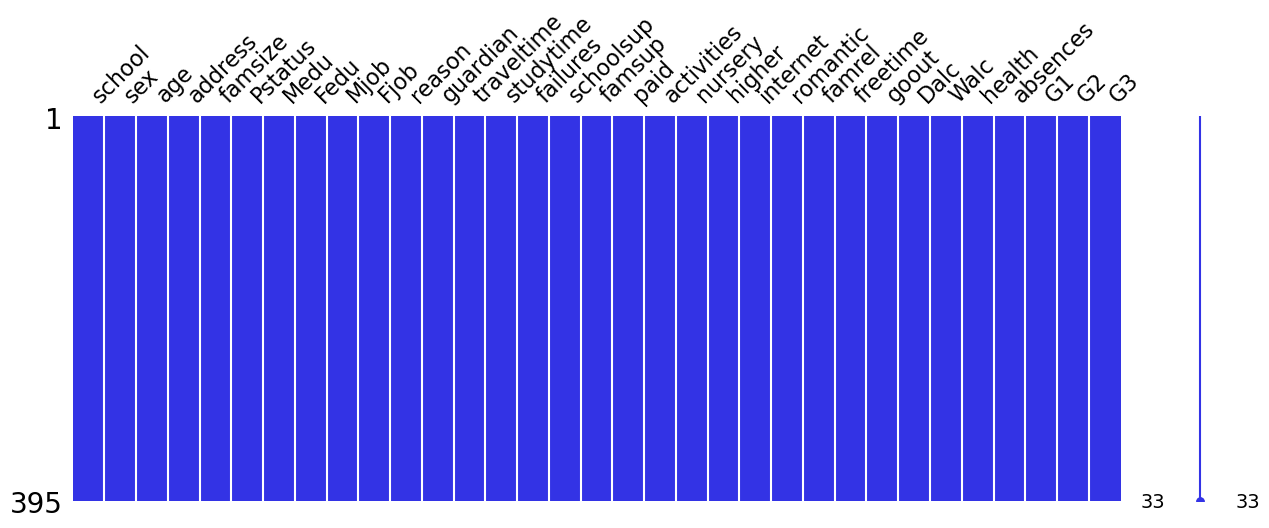

In [7]:
msno.matrix(df=mat_eda_df.iloc[:, :], color=(0.2, 0.2, 0.9), figsize=(15, 5))

<AxesSubplot: >

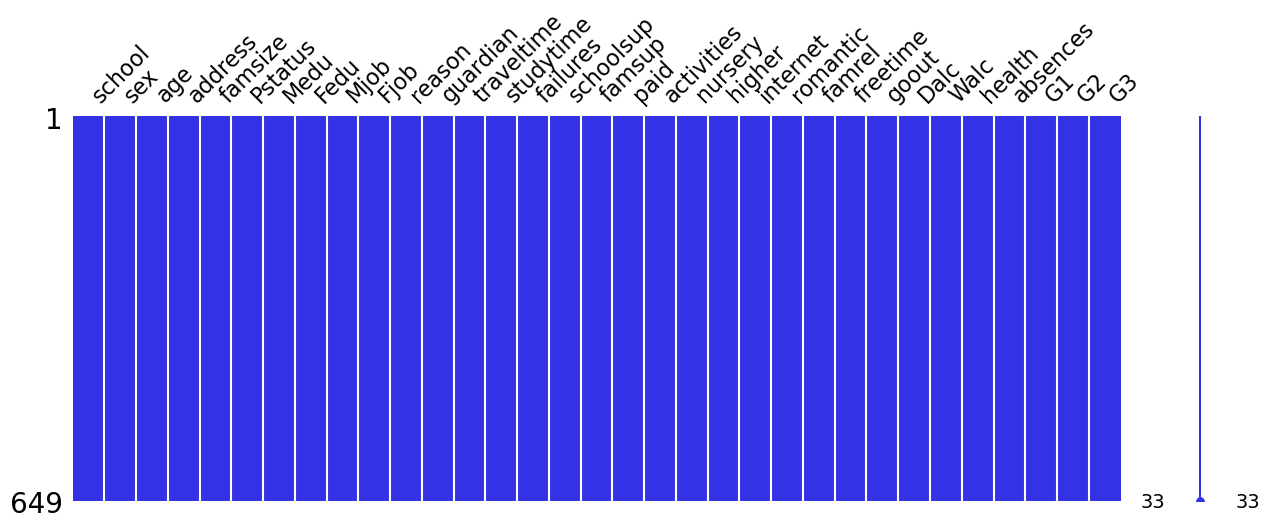

In [8]:
msno.matrix(df=pot_eda_df.iloc[:, :], color=(0.2, 0.2, 0.9), figsize=(15, 5))

In [13]:
def hist(data, column):
    temp = data[column]
    fig = px.histogram(temp, x=column)
    fig.show()

In [9]:
grade1 = mat_eda_df.G1
grade2 = mat_eda_df.G2
grade3 = mat_eda_df.G3

fig = px.histogram(grade1, x='G1')
fig.show()

In [11]:
fig = px.histogram(grade2, x='G2')
fig.show()

In [12]:
fig = px.histogram(grade3, x='G3')
fig.show()

In [14]:
hist(pot_eda_df, 'G1')

In [15]:
hist(pot_eda_df, 'G2')

In [16]:
hist(pot_eda_df, 'G3')

- 수학 성적의 분포는 나름 정규분포를 보여주고 있으며 outlier를 볼수 있음 -> 학기가 진행 될수록 수포자가 발생
- 포르투칼어 수업은 학교 지역이 포르투칼이라는 것을 고려해 보았을 때 높게 나오는 것 -> 앞쪽으로 치우쳐진 데이터 -> 정규화가 필요 , 그래도 과목 포기자는 별로 없는듯

In [147]:
mat_eda_df['Dalc'] = (mat_eda_df['Dalc'] + mat_eda_df['Walc']) / 2
pot_eda_df['Dalc'] = (pot_eda_df['Dalc'] + pot_eda_df['Walc']) / 2

In [34]:
mat_eda_df.drop('Walc', axis=1, inplace=True)

In [35]:
pot_eda_df.drop('Walc', inplace=True, axis=1)

In [19]:
mat_eda_df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [23]:
mat_eda_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [39]:
fig = px.imshow(mat_eda_df.corr().nlargest(n=15, columns='Dalc'), text_auto=True, aspect="auto")
fig.update_layout(go.Layout(title = {'text': 'Correlation', 'font':{'size':30}}))

fig.show()

/var/folders/bn/fjm2972n4d9442yqqtr7ywnc0000gn/T/ipykernel_49752/1356745113.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



In [37]:
fig = px.imshow(pot_eda_df.corr().nlargest(n=15, columns='Dalc'), text_auto=True, aspect="auto")
fig.update_layout(go.Layout(title = {'text': 'Correlation', 'font':{'size':30}}))

fig.show()

/var/folders/bn/fjm2972n4d9442yqqtr7ywnc0000gn/T/ipykernel_49752/1755661809.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



In [41]:
fig = px.imshow(mat_eda_df.corr(), text_auto=True, aspect="auto")
fig.update_layout(go.Layout(title = {'text': 'Correlation', 'font':{'size':30}}))

fig.show()

/var/folders/bn/fjm2972n4d9442yqqtr7ywnc0000gn/T/ipykernel_49752/2013462377.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



In [99]:
fig = px.imshow(pot_eda_df.corr().sort_values(by='Dalc', ascending=False), text_auto=True, aspect="auto")
fig.update_layout(go.Layout(title = {'text': 'Correlation', 'font':{'size':30}}))

fig.show()

/var/folders/bn/fjm2972n4d9442yqqtr7ywnc0000gn/T/ipykernel_49752/288619901.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



#### 일 소비량과 주말 소비량을 합쳐서 본 히트맵
학업에서 성공하는 비결은 술??????
- 술 마시면 자신감이 배가 되어 시험을 잘 본다는 것이 학계의 정설!!



- 술을 마신다고 해서 성적과 연관이 있을까? -> 결과적으로 술을 마시는 행위 자체가 일탈이라고 볼 수 있을까? -> 성적이 높다고 하여 모범생??????
- 부모님의 교육 여부에 따라 술 소비량이 달라질까?
- 나이가 많다고 해서 술을 많이 마실까?
- 학교별로 나누어서 술 소비량이 성적에 미치는 것을 구별해야 할까?
- 그럼 술을 많이 마시게 되는 요인이 무엇이 될까?
  - 학교 환경
  - 나가서 놀기
  - 나이
  - 부모님의 교육상태
  - 여가시간
  - 공부시간???
  - 건강
  - 결석
  - 성적?
  - 과목? 근데 수학을 선택했다면 누칼협아님?

## 상관관계

In [100]:
from dython.nominal import identify_nominal_columns
cat_featrues = identify_nominal_columns(mat_eda_df)
cat_featrues

['school',
 'sex',
 'address',
 'famsize',
 'Pstatus',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic']

In [101]:
from dython.nominal import associations

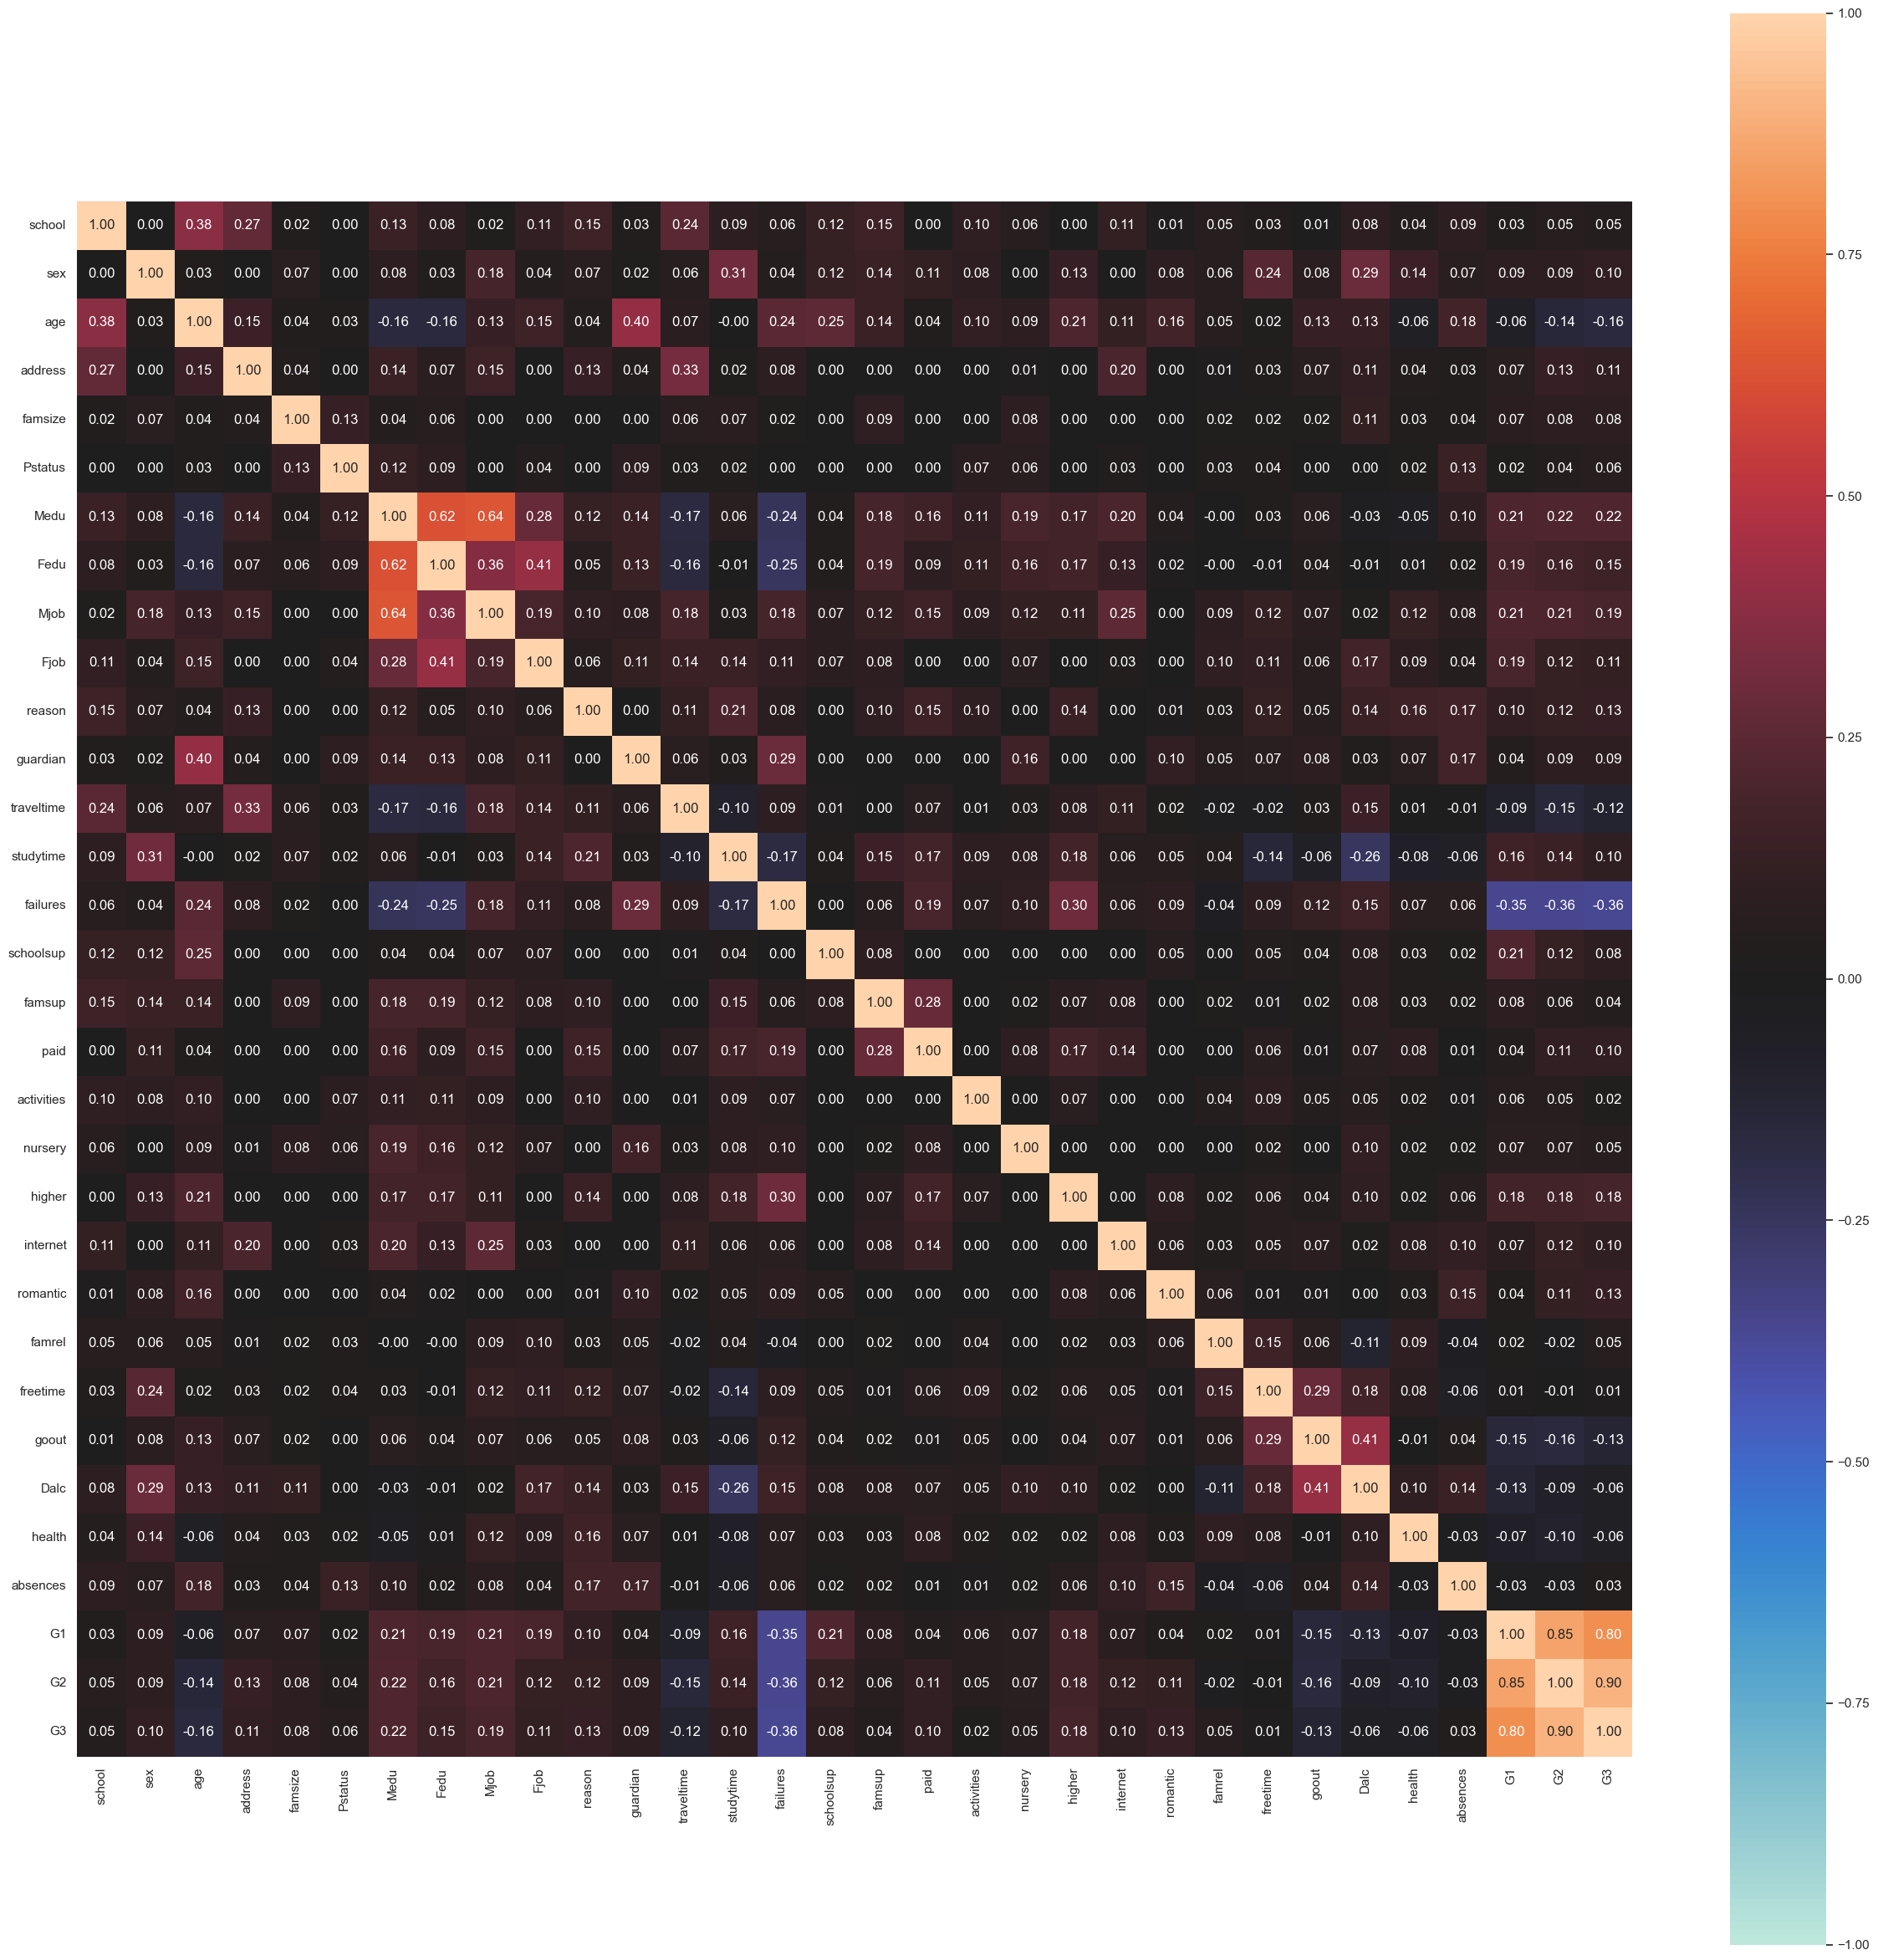

In [105]:
complete_correlation = associations(mat_eda_df, filename='mat_correlation.png', figsize=(30, 30))

In [117]:
complete_correlation['corr'].sort_values(by='Dalc', ascending=False).style.background_gradient(cmap='coolwarm', axis=None).set_precision(3)

/var/folders/bn/fjm2972n4d9442yqqtr7ywnc0000gn/T/ipykernel_49752/2241457791.py:1: FutureWarning:

this method is deprecated in favour of `Styler.format(precision=..)`



In [121]:
# 오름차순으로 정렬
corr_df = complete_correlation['corr'].sort_values(by='Dalc', ascending=False)

In [132]:
# 전체 상관관계 출력
px.bar(corr_df, x='Dalc')

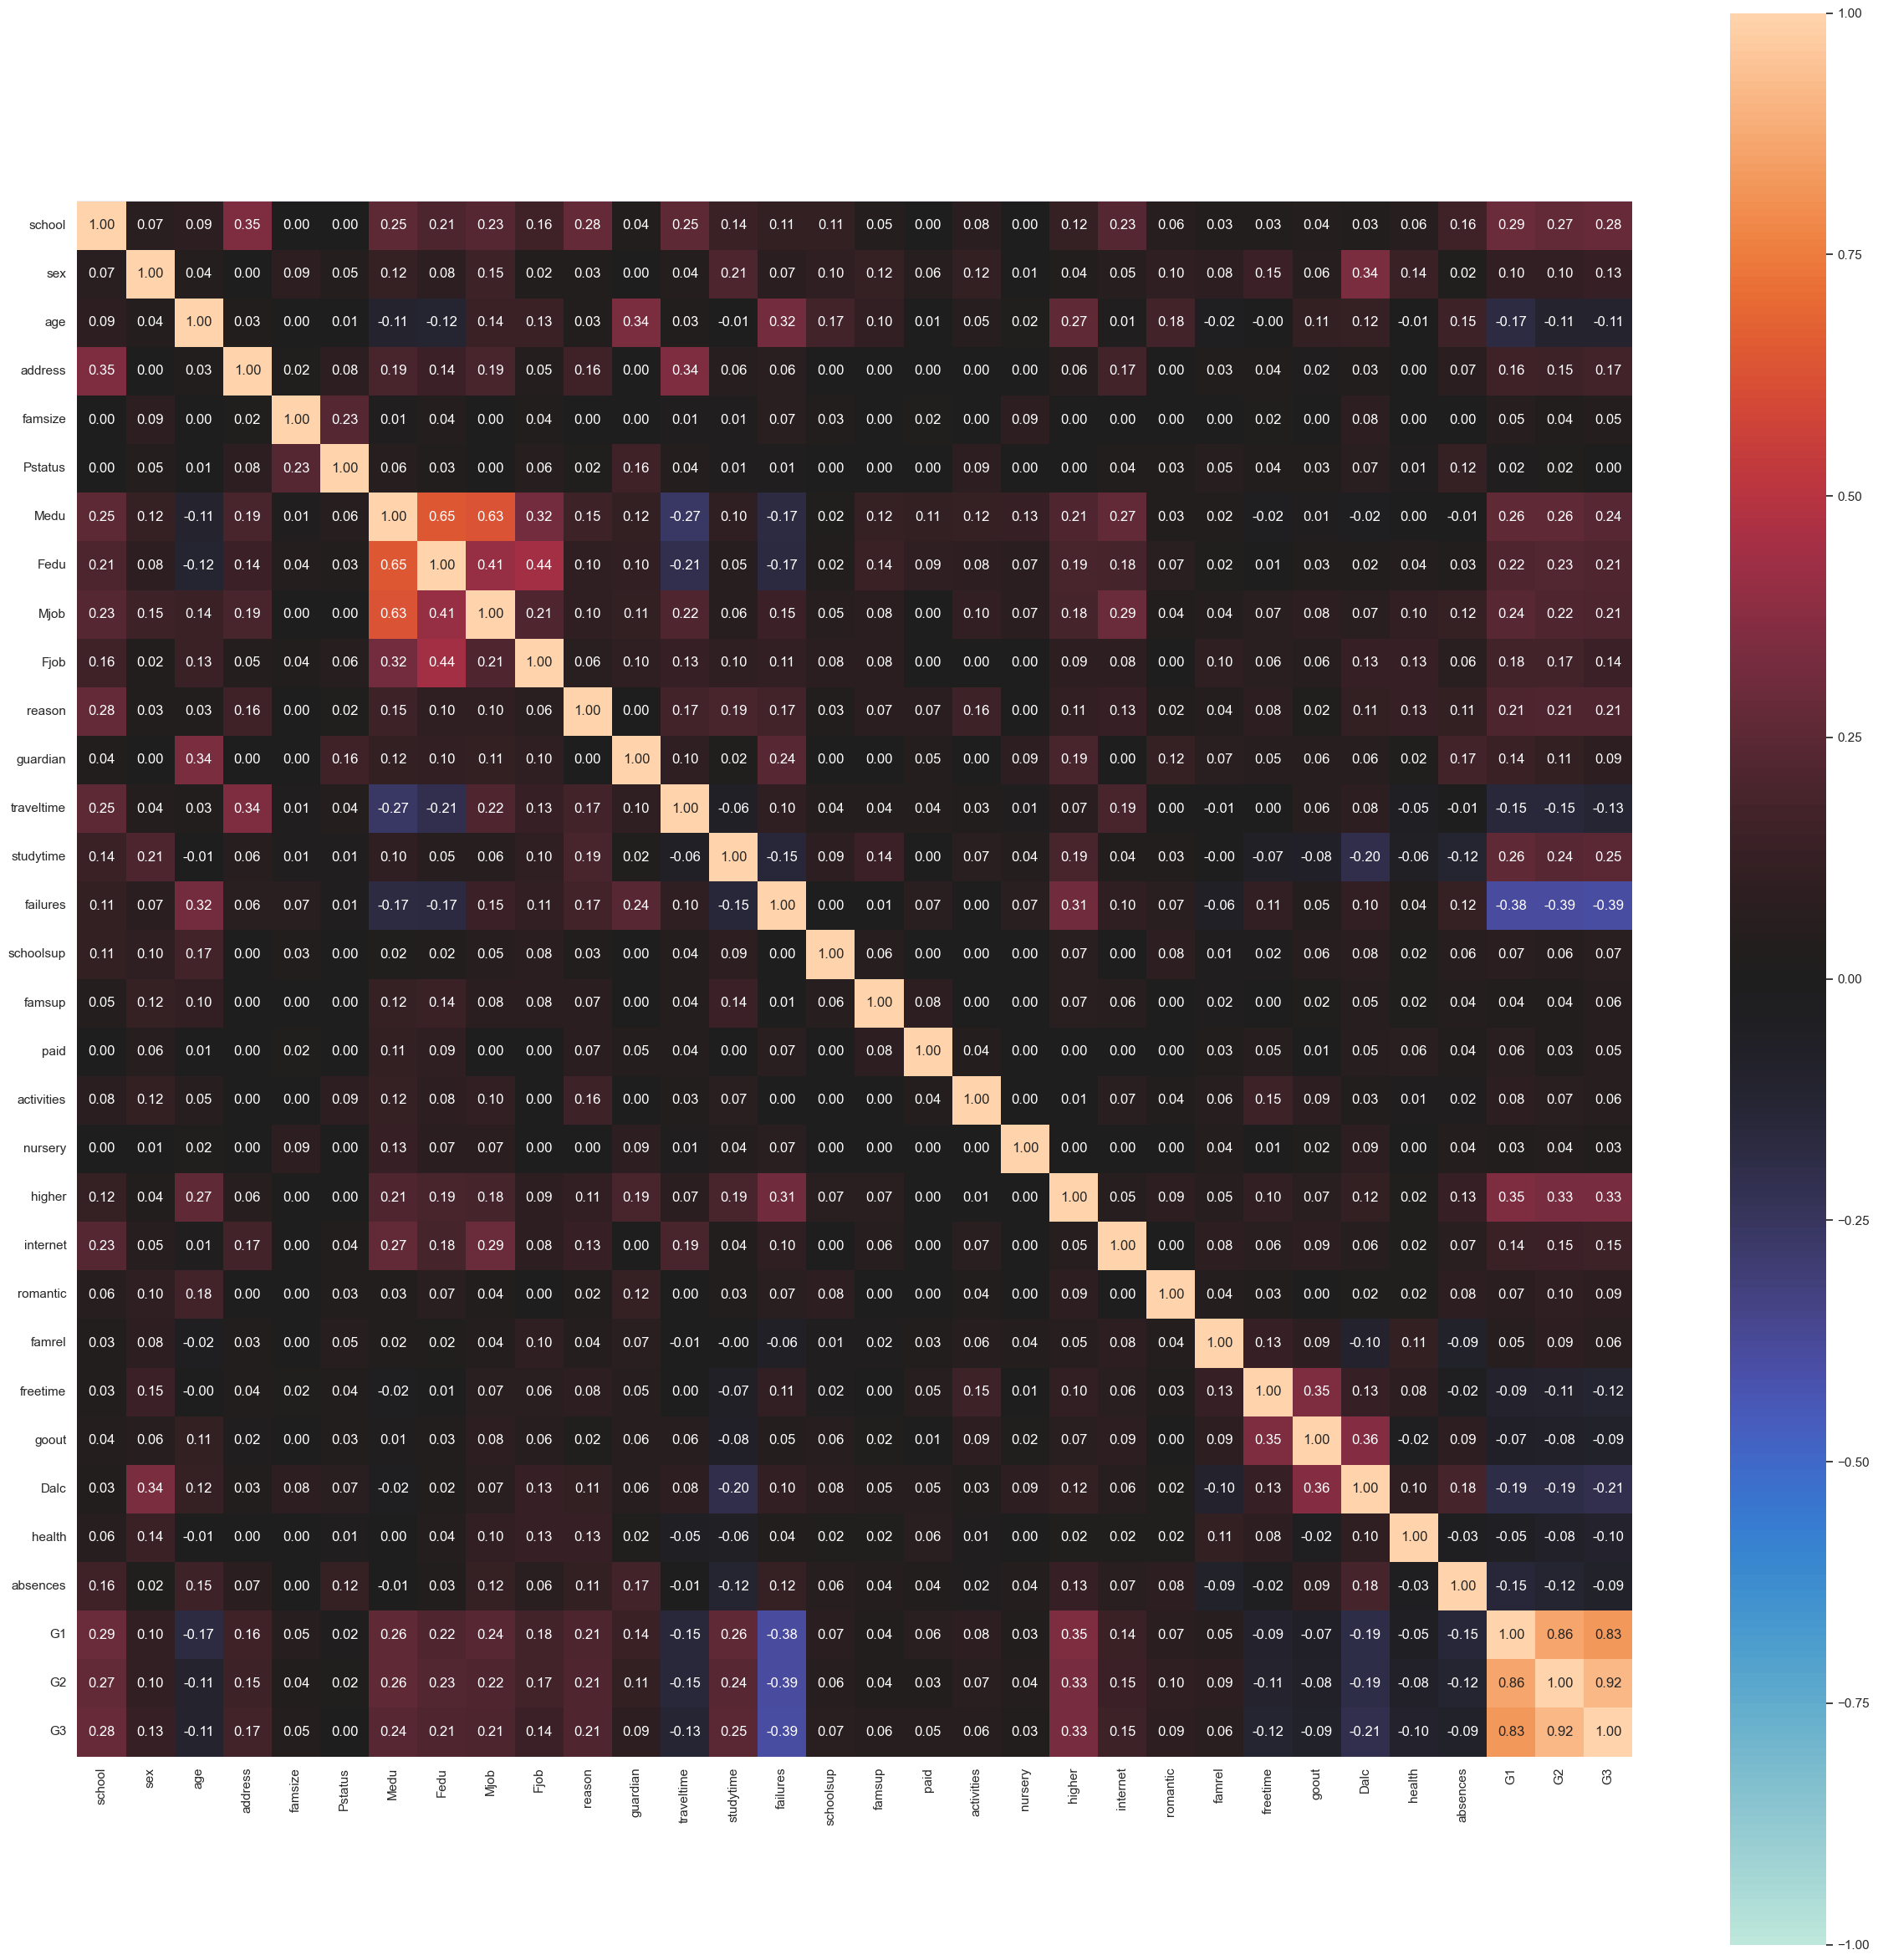

In [133]:
# 전체 상관관계 히트맵
complete_correlation = associations(pot_eda_df, filename='mat_correlation.png', figsize=(30, 30))

In [134]:
# Dalc 
complete_correlation['corr'].sort_values(by='Dalc', ascending=False).style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)

/var/folders/bn/fjm2972n4d9442yqqtr7ywnc0000gn/T/ipykernel_49752/3369932816.py:1: FutureWarning:

this method is deprecated in favour of `Styler.format(precision=..)`



In [135]:
corr_df = complete_correlation['corr'].sort_values(by='Dalc', ascending=False)

In [136]:
px.bar(corr_df, x='Dalc')

In [189]:
mat_eda_df['subject'] = 'M'

In [190]:
mat_eda_df

school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
390     MS   M   20       U     LE3       A     2     2  services  services   
391     MS   M   17       U     LE3       T     3     1  services  services   
392     MS   M   21       R     GT3       T     1     1     other     other   
393     MS   M   18       R     LE3       T     3     2  services     other   
394     MS   M   19       U     LE3       T     1     1     other   at_home   

     ... freetime goout  Dalc  Walc  health absences  G1  G2  G3 subject  
0    ...        3     4   1.0     1       3        6   5   6   6       M  
1    ...        3     3   1.0     1       3        4   5   5   6       M  
2    ...        3     2   2.5     3       3       10   7   8  10       M  
3    ...        2     2   1.0     1       5        2  15  14  15       M  
4    ...        3     2   1.5     2       5        4   6  10  10       M  
..   ...      ...   ...   ...   ...     ...      ...  ..  ..  ..     ...  
390  ...        5     4   4.5     5       4       11   9   9   9       M  
391  ...        4     5   3.5     4       2        3  14  16  16       M  
392  ...        5     3   3.0     3       3        3  10   8   7       M  
393  ...        4     1   3.5     4       5        0  11  12  10       M  
394  ...        2     3   3.0     3       5        5   8   9   9       M  

[395 rows x 34 columns]

In [191]:
pot_eda_df['subject'] = 'P'

0 ~ 394 : M
395 ~  : P

In [192]:
concat_df = pd.concat([mat_eda_df, pot_eda_df], axis=0)

In [201]:
concat_df['Malc'] = (concat_df['Dalc'] + concat_df['Walc']) / 2

In [195]:
concat_df.reset_index(inplace=True)

In [196]:
concat_df.drop('index', axis=1, inplace=True)

In [204]:
concat_df.drop(['Dalc', 'Walc'], axis=1, inplace=True)

In [205]:
concat_df

level_0 school sex  age address famsize Pstatus  Medu  Fedu      Mjob  \
0           0     GP   F   18       U     GT3       A     4     4   at_home   
1           1     GP   F   17       U     GT3       T     1     1   at_home   
2           2     GP   F   15       U     LE3       T     1     1   at_home   
3           3     GP   F   15       U     GT3       T     4     2    health   
4           4     GP   F   16       U     GT3       T     3     3     other   
...       ...    ...  ..  ...     ...     ...     ...   ...   ...       ...   
1039     1039     MS   F   19       R     GT3       T     2     3  services   
1040     1040     MS   F   18       U     LE3       T     3     1   teacher   
1041     1041     MS   F   18       U     GT3       T     1     1     other   
1042     1042     MS   M   17       U     LE3       T     3     1  services   
1043     1043     MS   M   18       R     LE3       T     3     2  services   

      ... famrel freetime goout  health  absences  G1  G2  G3 subject  Malc  
0     ...      4        3     4       3         6   5   6   6       M  1.00  
1     ...      5        3     3       3         4   5   5   6       M  1.00  
2     ...      4        3     2       3        10   7   8  10       M  2.75  
3     ...      3        2     2       5         2  15  14  15       M  1.00  
4     ...      4        3     2       5         4   6  10  10       M  1.75  
...   ...    ...      ...   ...     ...       ...  ..  ..  ..     ...   ...  
1039  ...      5        4     2       5         4  10  11  10       P  1.75  
1040  ...      4        3     4       1         4  15  15  16       P  1.00  
1041  ...      1        1     1       5         6  11  12   9       P  1.00  
1042  ...      2        4     5       2         6  10  10  10       P  3.75  
1043  ...      4        4     1       5         4  10  11  11       P  3.75  

[1044 rows x 34 columns]

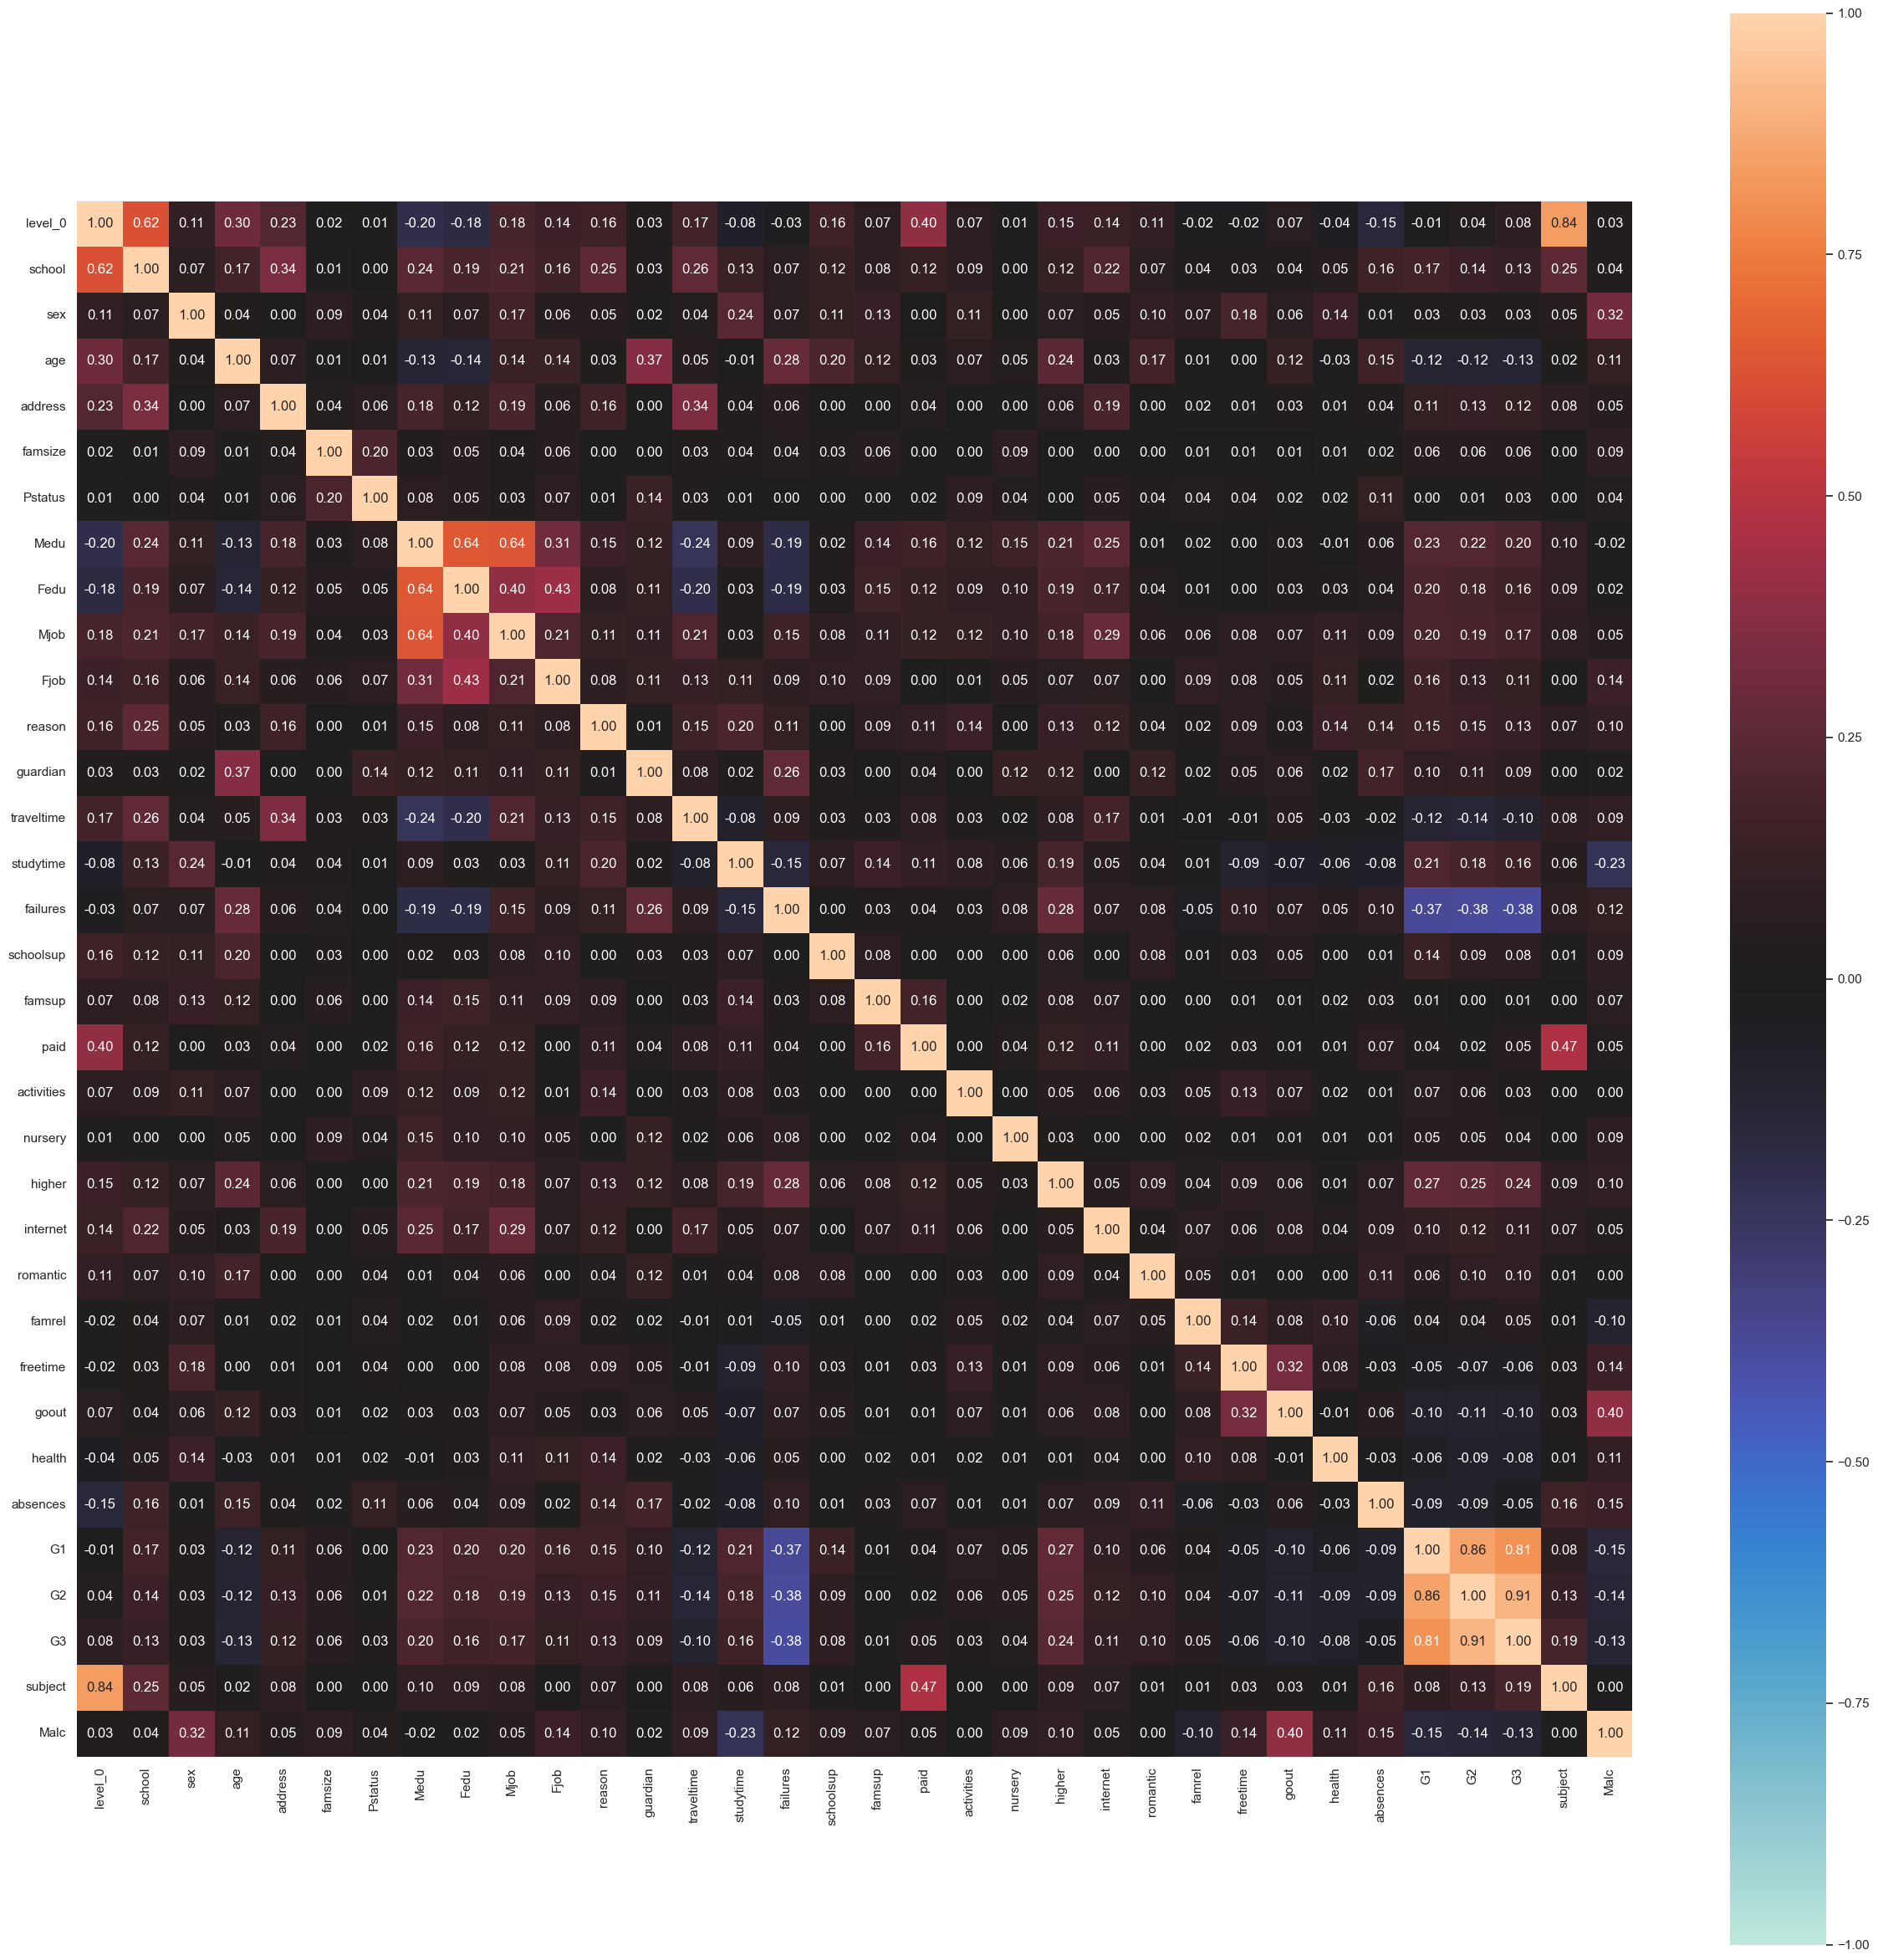

In [208]:
complete_correlation = associations(concat_df, filename='concat_corr.png', figsize=(30, 30))

In [210]:
corr_df = complete_correlation['corr'].sort_values(by='Malc', ascending=False)

In [212]:
px.bar(corr_df, x='Malc')

In [217]:
concat_df['AGrade'] = round((concat_df['G1'] + concat_df['G2'] +concat_df['G3']) / 3, 2)
concat_df.head(10)

level_0 school sex  age address famsize Pstatus  Medu  Fedu      Mjob  ...  \
0        0     GP   F   18       U     GT3       A     4     4   at_home  ...   
1        1     GP   F   17       U     GT3       T     1     1   at_home  ...   
2        2     GP   F   15       U     LE3       T     1     1   at_home  ...   
3        3     GP   F   15       U     GT3       T     4     2    health  ...   
4        4     GP   F   16       U     GT3       T     3     3     other  ...   
5        5     GP   M   16       U     LE3       T     4     3  services  ...   
6        6     GP   M   16       U     LE3       T     2     2     other  ...   
7        7     GP   F   17       U     GT3       A     4     4     other  ...   
8        8     GP   M   15       U     LE3       A     3     2  services  ...   
9        9     GP   M   15       U     GT3       T     3     4     other  ...   

  freetime goout health  absences  G1  G2  G3 subject  Malc AGrade  
0        3     4      3         6   5   6   6       M  1.00   5.67  
1        3     3      3         4   5   5   6       M  1.00   5.33  
2        3     2      3        10   7   8  10       M  2.75   8.33  
3        2     2      5         2  15  14  15       M  1.00  14.67  
4        3     2      5         4   6  10  10       M  1.75   8.67  
5        4     2      5        10  15  15  15       M  1.75  15.00  
6        4     4      3         0  12  12  11       M  1.00  11.67  
7        1     4      1         6   6   5   6       M  1.00   5.67  
8        2     2      1         0  16  18  19       M  1.00  17.67  
9        5     1      5         0  14  15  15       M  1.00  14.67  

[10 rows x 35 columns]

In [218]:

concat_df.drop(['G1', 'G2', 'G3'], axis=1, inplace=True)
concat_df.head(10)

level_0 school sex  age address famsize Pstatus  Medu  Fedu      Mjob  ...  \
0        0     GP   F   18       U     GT3       A     4     4   at_home  ...   
1        1     GP   F   17       U     GT3       T     1     1   at_home  ...   
2        2     GP   F   15       U     LE3       T     1     1   at_home  ...   
3        3     GP   F   15       U     GT3       T     4     2    health  ...   
4        4     GP   F   16       U     GT3       T     3     3     other  ...   
5        5     GP   M   16       U     LE3       T     4     3  services  ...   
6        6     GP   M   16       U     LE3       T     2     2     other  ...   
7        7     GP   F   17       U     GT3       A     4     4     other  ...   
8        8     GP   M   15       U     LE3       A     3     2  services  ...   
9        9     GP   M   15       U     GT3       T     3     4     other  ...   

  internet romantic famrel  freetime  goout  health absences subject  Malc  \
0       no       no      4         3      4       3        6       M  1.00   
1      yes       no      5         3      3       3        4       M  1.00   
2      yes       no      4         3      2       3       10       M  2.75   
3      yes      yes      3         2      2       5        2       M  1.00   
4       no       no      4         3      2       5        4       M  1.75   
5      yes       no      5         4      2       5       10       M  1.75   
6      yes       no      4         4      4       3        0       M  1.00   
7       no       no      4         1      4       1        6       M  1.00   
8      yes       no      4         2      2       1        0       M  1.00   
9      yes       no      5         5      1       5        0       M  1.00   

  AGrade  
0   5.67  
1   5.33  
2   8.33  
3  14.67  
4   8.67  
5  15.00  
6  11.67  
7   5.67  
8  17.67  
9  14.67  

[10 rows x 32 columns]

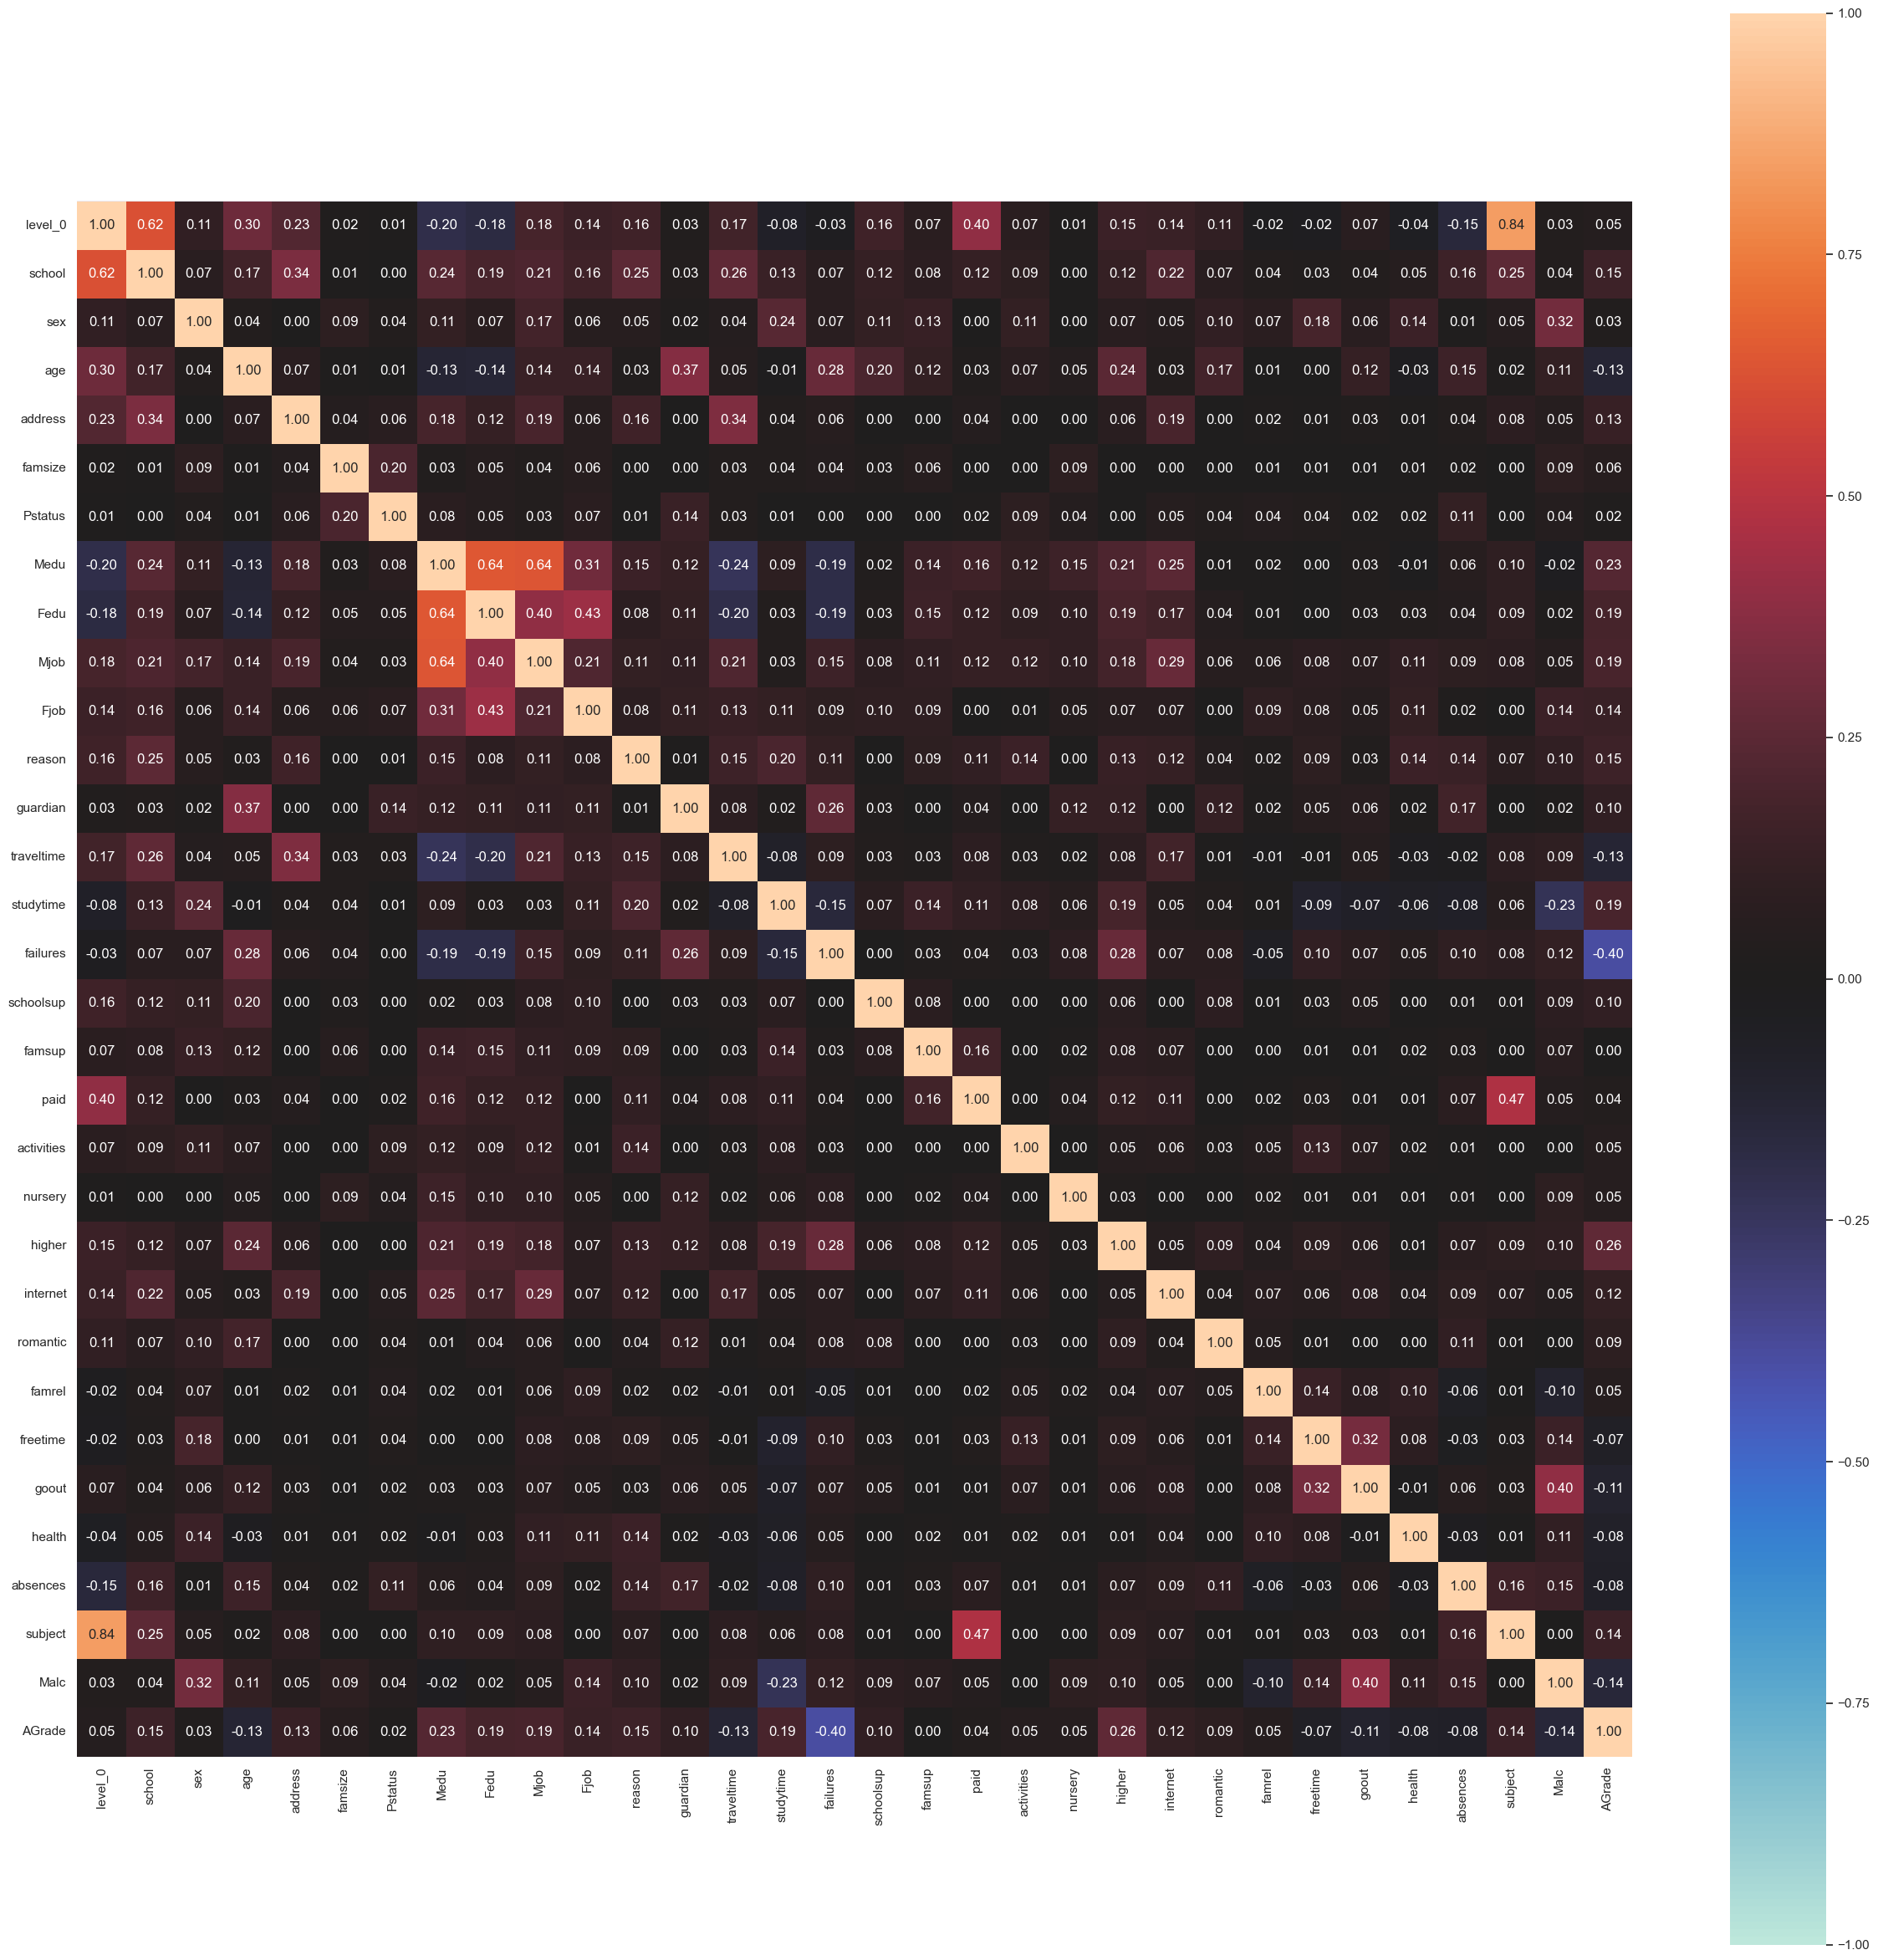

In [219]:
complete_correlation = associations(concat_df, filename='concat_corr2.png', figsize=(30, 30))

In [220]:
corr_df = complete_correlation['corr'].sort_values(by='Malc', ascending=False)

In [221]:
px.bar(corr_df, x='Malc')

In [225]:
concat_df.drop('level_0', inplace=True, axis=1)

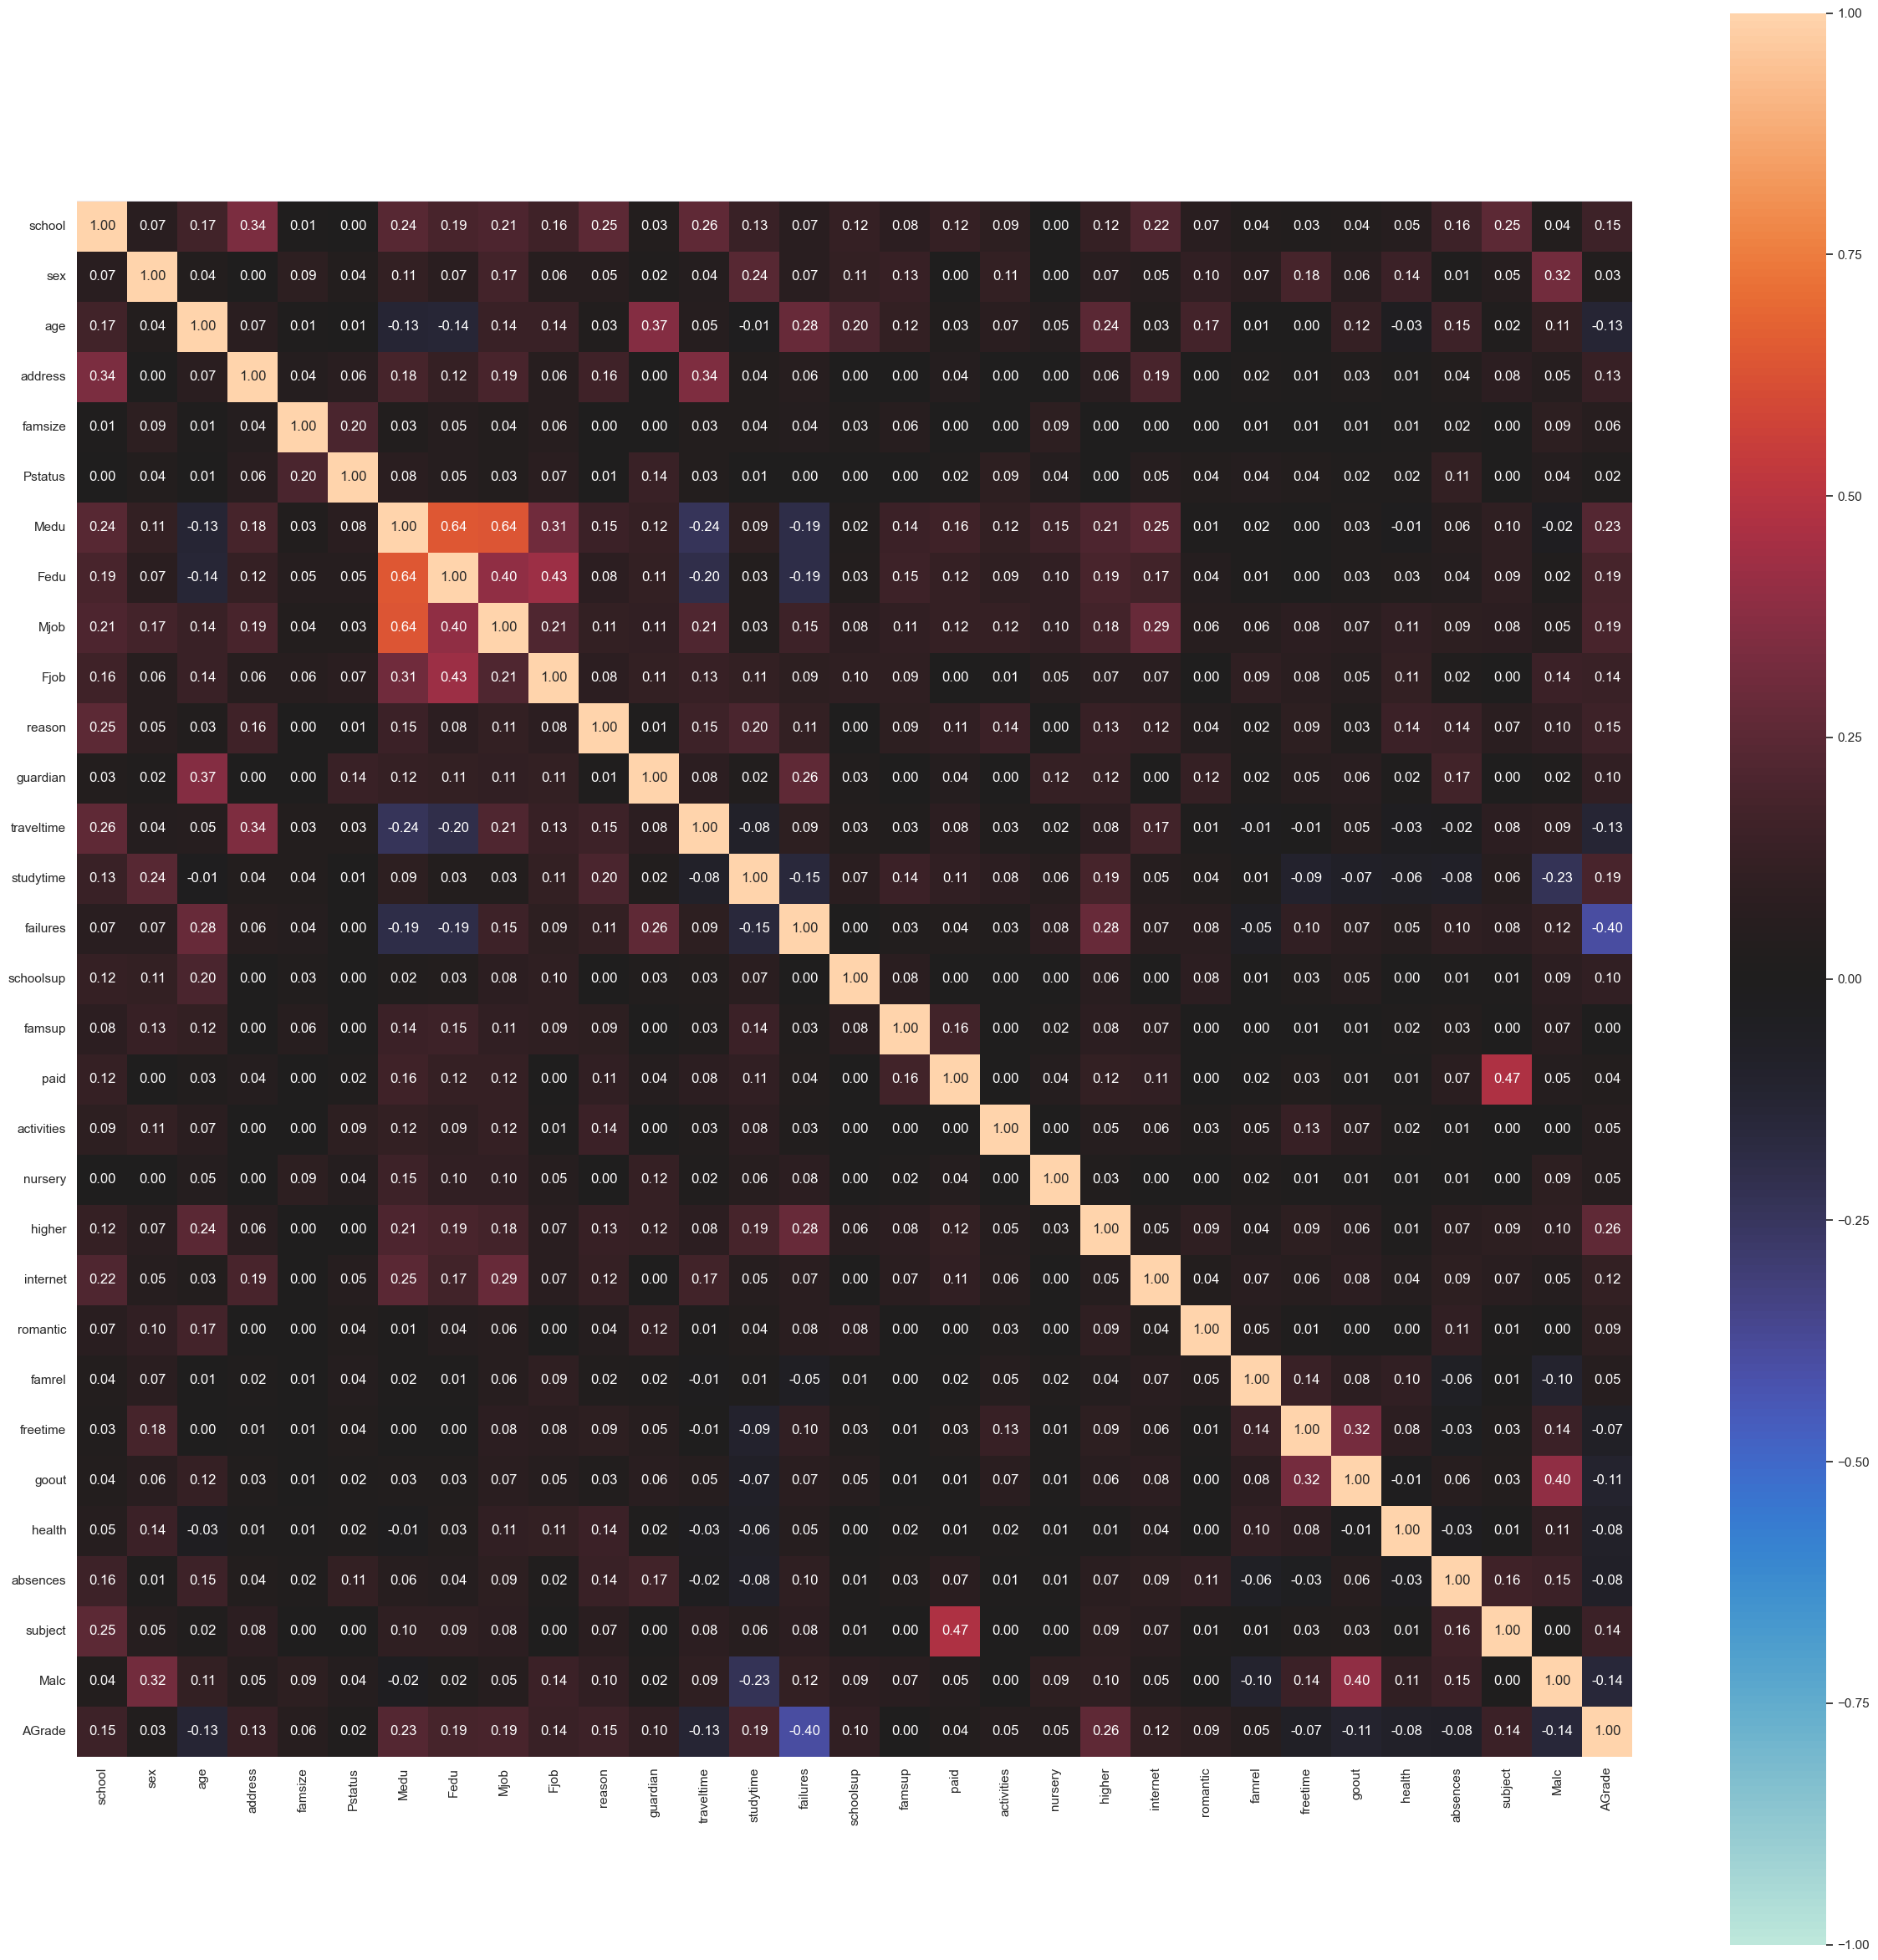

In [226]:
complete_correlation = associations(concat_df, filename='concat_corr2.png', figsize=(30, 30))

In [257]:
corr_df = complete_correlation['corr'].nlargest(n=10).sort_values(by='Malc', ascending=False)

KeyError: 'corr'

In [301]:
abs_df = corr_df.Malc.abs().to_frame('corr_score').corr_score.nlargest(31).to_frame('score')

- 음의 상관관계도 포함

In [303]:
abs_df.reset_index(inplace=True)

In [313]:
abs_df

index     score
0         Malc  1.000000
1        goout  0.395191
2          sex  0.316282
3    studytime  0.229409
4     absences  0.147124
5       AGrade  0.144230
6         Fjob  0.141943
7     freetime  0.141569
8     failures  0.116018
9          age  0.111640
10      health  0.105030
11      reason  0.102719
12      famrel  0.102096
13      higher  0.097999
14  traveltime  0.094718
15     famsize  0.092774
16     nursery  0.089368
17   schoolsup  0.085658
18      famsup  0.067803
19     address  0.050324
20        Mjob  0.047270
21    internet  0.045531
22        paid  0.045331
23     Pstatus  0.044111
24      school  0.036237
25        Medu  0.024909
26    guardian  0.019142
27        Fedu  0.016752
28    romantic  0.004910
29  activities  0.003243
30     subject  0.001171

In [311]:
choice_col_list_df = abs_df.head(17)

In [312]:
choice_col_list_df

index     score
0         Malc  1.000000
1        goout  0.395191
2          sex  0.316282
3    studytime  0.229409
4     absences  0.147124
5       AGrade  0.144230
6         Fjob  0.141943
7     freetime  0.141569
8     failures  0.116018
9          age  0.111640
10      health  0.105030
11      reason  0.102719
12      famrel  0.102096
13      higher  0.097999
14  traveltime  0.094718
15     famsize  0.092774
16     nursery  0.089368

In [319]:
Malc_df = corr_df[['Malc']]

In [321]:
Malc_df.reset_index(inplace=True)

In [328]:
pos_14_corr_df = Malc_df.head(14)

In [348]:
neg_4_corr_df = Malc_df.tail(3)

In [349]:
most_corr_df= pd.concat([pos_14_corr_df, neg_4_corr_df],axis=0)

In [350]:
most_corr_df.columns = ['features', 'score']

In [351]:
most_corr_df.reset_index(inplace=True)

In [352]:
most_corr_df.drop('index' , axis=1, inplace=True)

In [363]:
select_df

features     score
0      Malc  1.000000
1     goout  0.395191
2       sex  0.316282
3  absences  0.147124
4      Fjob  0.141943
5  freetime  0.141569
6  failures  0.116018
7       age  0.111640
8    health  0.105030

In [378]:
most_corr_df.features.to_list()

['Malc',
 'goout',
 'sex',
 'absences',
 'Fjob',
 'freetime',
 'failures',
 'age',
 'health',
 'reason',
 'higher',
 'traveltime',
 'famsize',
 'nursery',
 'famrel',
 'AGrade',
 'studytime']

In [373]:
neg_ls = neg_4_corr_df['index'].to_list()

In [359]:
select_df = most_corr_df.head(9)

In [360]:
ls = select_df.features.to_list()

In [365]:
ls[1:]

['goout', 'sex', 'absences', 'Fjob', 'freetime', 'failures', 'age', 'health']

- 용정 : 'failures', 'freetime', 'Fjob', AGrade
- 종호 : 'studytime', 'sex', 'age', 'reason'
- 정원 : 'goout', famrel, 'absences', 'health'

- Medu, famrel, AGrade, studytime